<a href="https://colab.research.google.com/github/NoahDPJ03/Portfolio/blob/main/Linear_Regression_from_Scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

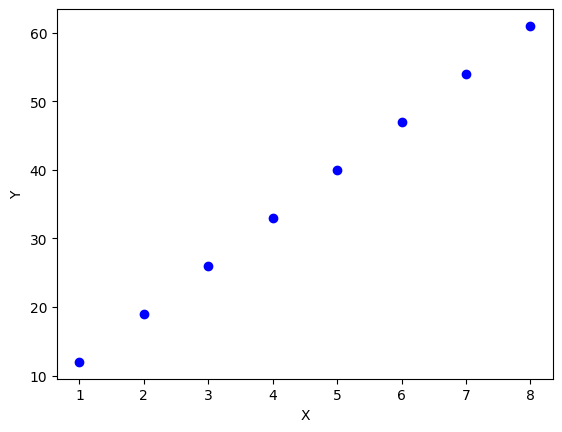

In [94]:
X = np.array([1, 2, 3, 4, 5, 6, 7, 8])
Y = np.array([12, 19, 26, 33, 40, 47, 54, 61]) # y = 7x + 5

plt.scatter(X, Y, color='blue', )
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

7.011853433702174 4.9333563524124875


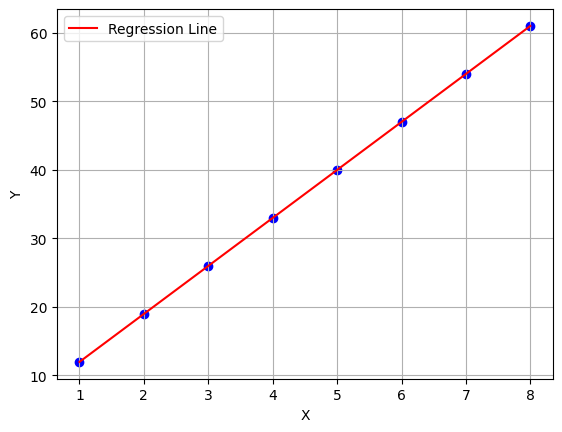

In [155]:
m = 0.0
b = 0.0
change_per_rev = 0.01
revolutions = 1000

n = len(X)

for i in range(revolutions):

    dm = (-2/n) * sum(X * (Y - (m * X + b)))
    db = (-2/n) * sum(Y - (m * X + b))

    m = m - change_per_rev*dm
    b = b - change_per_rev*db


print(m, b)

y_pred = m*X + b

plt.scatter(X, Y, color='blue')
plt.plot([min(X), max(X)], [min(y_pred), max(y_pred)], color='red', label = "Regression Line")
plt.xlabel('X')
plt.grid(True)
plt.ylabel('Y')
plt.legend()
plt.show()

In [96]:

sample_data = {
    'X': [1, 2, 3, 4, 5, 6, 7, 8],
    'Y': [1, 2, 3, 4, 5, 6, 7, 8],
    'Z': [1, 2, 3, 4, 5, 6, 7, 8],
    'T': [7, 10, 13, 16, 19, 22, 25, 28] #T = X + Y + Z + 4

}

df = pd.DataFrame(sample_data)

df.head()

,X,Y,Z,T
0,1,1,1,7
1,2,2,2,10
2,3,3,3,13
3,4,4,4,16
4,5,5,5,19


In [97]:
sample_data_vars = df.drop('T', axis=1)
sample_data_target = df['T']

b = 0.0

slopes = np.zeros(len(sample_data_vars.columns))

print(slopes)
change_per_rev = 0.01
revolutions = 1000

n = len(sample_data_target)

for i in range(revolutions):

    pred = b + np.dot(sample_data_vars, slopes)
    error = sample_data_target - pred

    db = (-2/n) * sum(error)
    dm = (-2/n) * np.dot(sample_data_vars.T, error)

    b = b - change_per_rev*db
    slopes = slopes - change_per_rev*dm

print(slopes, b)


[0. 0. 0.]
[1.00375963 1.00375963 1.00375963] 3.9362565238679252


In [121]:
def LinearRegr(X, Y, change_per_rev, revolutions):

  b = 0.0

  slopes = np.zeros(X.shape[1])

  n = len(Y)

  for i in range(revolutions):

    pred = b + np.dot(X, slopes)
    error = Y - pred

    db = (-2/n) * sum(error)
    dm = (-2/n) * np.dot(X.T, error)

    b = b - change_per_rev*db
    slopes = slopes - change_per_rev*dm

    if i % 100 == 0:
      print(f"revolution: {i}")

  return slopes, b

In [99]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [142]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ai_job_dataset.csv')

In [143]:
dataclean = data.drop(['job_id', 'required_skills', 'company_name', 'job_description_length', 'application_deadline', 'posting_date', 'job_title', 'salary_currency'], axis = 1, errors = 'ignore')
dataclean = dataclean.dropna()
dataclean = pd.get_dummies(dataclean)
dataclean

,salary_usd,remote_ratio,years_experience,benefits_score,experience_level_EN,experience_level_EX,experience_level_MI,experience_level_SE,employment_type_CT,employment_type_FL,...,industry_Gaming,industry_Government,industry_Healthcare,industry_Manufacturing,industry_Media,industry_Real Estate,industry_Retail,industry_Technology,industry_Telecommunications,industry_Transportation
0,90376,50,9,5.9,False,False,False,True,True,False,...,False,False,False,False,False,False,False,False,False,False
1,61895,100,1,5.2,True,False,False,False,True,False,...,False,False,False,False,True,False,False,False,False,False
2,152626,0,2,9.4,False,False,True,False,False,True,...,False,False,False,False,False,False,False,False,False,False
3,80215,50,7,8.6,False,False,False,True,False,True,...,False,False,False,False,False,False,False,False,False,False
4,54624,100,0,6.6,True,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,38604,50,1,7.9,True,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
14996,57811,0,0,8.2,True,False,False,False,True,False,...,False,True,False,False,False,False,False,False,False,False
14997,189490,50,17,7.4,False,True,False,False,True,False,...,False,False,False,True,False,False,False,False,False,False
14998,79461,0,1,5.6,True,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False


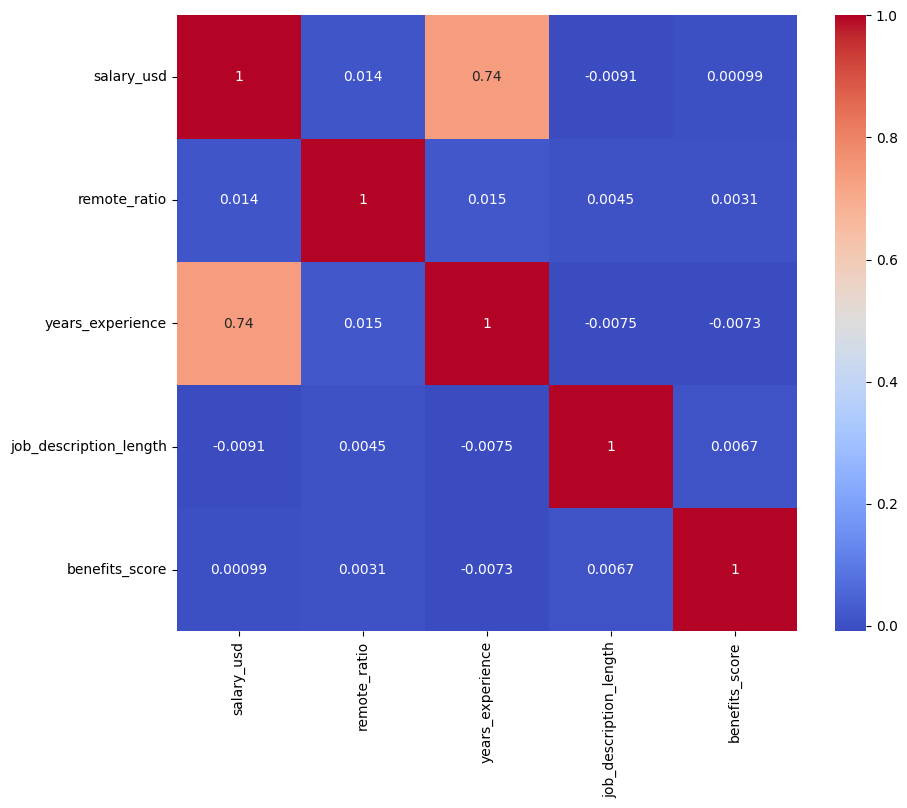

In [145]:
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.show()

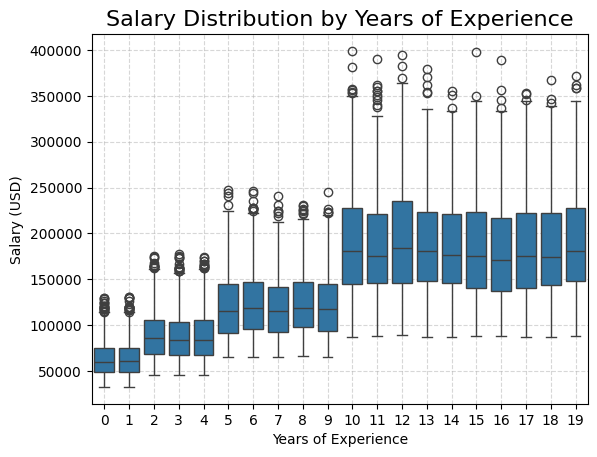

In [154]:
sns.boxplot(x='years_experience', y='salary_usd', data=data)
plt.title('Salary Distribution by Years of Experience', fontsize=16)
plt.grid(True, linestyle='--', alpha=0.5)
plt.xlabel('Years of Experience')
plt.ylabel('Salary (USD)')
plt.show()

In [136]:
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(data.drop('salary_usd', axis=1), data['salary_usd'], test_size=0.2, random_state=42)

corr_matrix = X_train.corr().abs()

upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

X_train = X_train.drop(to_drop, axis=1)
X_test = X_test.drop(to_drop, axis=1)

scaler = StandardScaler()

X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

coeff, b_int = LinearRegr(X_train_s, y_train, change_per_rev = 0.01, revolutions=2000)

print(coeff, b_int)

revolution: 0
revolution: 100
revolution: 200
revolution: 300
revolution: 400
revolution: 500
revolution: 600
revolution: 700
revolution: 800
revolution: 900
revolution: 1000
revolution: 1100
revolution: 1200
revolution: 1300
revolution: 1400
revolution: 1500
revolution: 1600
revolution: 1700
revolution: 1800
revolution: 1900
[ 3.29850978e+02  1.65965846e+03  7.39124926e+01 -2.14522589e+04
  3.00872343e+04 -1.14959522e+04  2.95213076e+03 -2.77392089e+02
  2.31255699e+01  1.09248180e+02  1.44230903e+02  1.26759922e+03
 -6.89656758e+03 -5.71235222e+02 -5.98388069e+03  9.54033040e+03
 -6.02033404e+03 -1.06045964e+02  1.37291075e+03 -6.14038298e+03
 -6.24025588e+03 -6.40411269e+03 -6.21439008e+03  2.51005168e+03
  9.22470923e+03  2.79846489e+03 -6.32569997e+03  1.92701605e+03
  1.27186160e+04  3.28572996e+03  6.10694325e+03  7.24403931e+03
 -8.57760331e+02 -6.34846626e+03 -2.08092934e+02  4.38374456e+02
  4.08876051e+02 -9.72583300e+01  4.72985541e+02 -2.07642447e+02
 -7.53307931e+01 -1.13

In [137]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = b_int + np.dot(X_test_s, coeff)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 538718116.7030979
R-squared: 0.8522922194251689


In [135]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

reg = LinearRegression()

reg.fit(X_train, y_train)
r2 = r2_score(y_test, reg.predict(X_test))
print(reg.coef_)
print(reg.intercept_)
print(r2)

[ 8.16717181e+00 -1.56253023e+02  5.50661872e+01 -5.23996949e+04
  7.34474147e+04 -2.81155464e+04  7.06782665e+03 -6.29844223e+02
  3.96756463e+01  2.55128603e+02  3.35039973e+02  5.85931891e+03
 -3.07781789e+04 -2.52178218e+03 -2.74641267e+04  4.32689138e+04
 -2.85917990e+04 -4.63768133e+02  6.09959331e+03 -2.81235165e+04
 -2.87620956e+04 -2.93809139e+04 -2.85170932e+04  1.17296084e+04
  4.33277529e+04  1.29069984e+04 -2.90809847e+04  8.83700306e+03
  5.76736400e+04  1.51859474e+04  2.87954826e+04  1.53597431e+04
 -1.86562583e+03 -1.34941172e+04 -8.96896171e+02  1.98224811e+03
  1.86742009e+03 -4.72091817e+02  2.14331733e+03 -9.65394272e+02
 -2.83617782e+02 -4.59556552e+02 -2.39362557e+02  1.06570285e+02
 -1.61721098e+02  1.74555991e+02 -1.62333354e+02 -1.65106310e+03
  3.68458635e+02  1.28481304e+03 -1.21038452e+03 -1.00767940e+03
 -1.86396300e+03  1.44668013e+03 -1.85341216e+02  3.76776807e+02
 -4.35129642e+02  2.43694052e+02 -1.13077648e+02 -3.32540299e+02
  5.55091854e+02  2.10753